In [10]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Original Haar Cascades

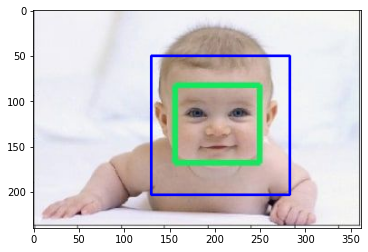

In [12]:
# Loading image
test_image = cv2.imread('baby.jpeg')

# Converting to gray scale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray, cmap='gray')

haar_cascade_face = cv2.CascadeClassifier('haar_xml/haarcascade_frontalface_default.xml')
face_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor=1.1, minNeighbors=4)

for (x,y,w,h) in face_rects:
    cv2.rectangle(test_image, (x,y), (x+w, y+h), (255,0,0), 2)

plt.imshow(convertToRGB(test_image))

## LBP-based Haar Cascades

In [ ]:
#code

## HOG+SVM Face Detection

In [ ]:
#code